## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

### Loading Data

In [2]:
data = pd.read_csv('Amazon_Reviews.csv', encoding = 'unicode_escape')
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [3]:
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [4]:
data.isna().sum()

text         1
sentiment    0
dtype: int64

In [5]:
data.dropna(inplace = True)
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [6]:
data['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [7]:
data['sentiment'].replace(['negative','neutral','positive'],[0,1,2],inplace = True)
data.head()

,text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0


c:\users\manoj\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


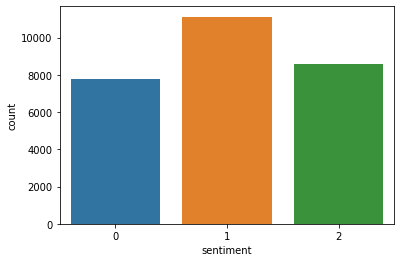

In [8]:
sns.countplot(data['sentiment'])
plt.show()

## Text Preprocessing

#### Changing to lowercase and removing Punctuations 

In [9]:
text_data = []
x = data['text'].replace('[^a-zA-z]',' ',regex = True)
x = x.values
for text in x:
    lower_case = text.lower()
    cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
    text_data.append(cleaned_text)


#### Removing Stopwords and Stemming

In [10]:
stemmer=PorterStemmer()
stemmed_data = []
for i in text_data:
    words=word_tokenize(i)
    #List comprehension
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = ' '.join(words)
    stemmed_data.append(words)
stemmed_data = [text for text in stemmed_data if text != []]


In [11]:
 stemmed_data[:5]

['id respond go',
 'sooo sad miss san diego',
 'boss bulli',
 'interview leav alon',
 'son couldnt put releas alreadi bought']

### Creating CountVectorizer 

In [12]:
count_vectorizer = CountVectorizer(max_features = 1500)
train_cv = count_vectorizer.fit_transform(stemmed_data).toarray()

### Tf-idf Vectorizer

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features = 1500)
train_tfidf = tfidf_vectorizer.fit_transform(stemmed_data).toarray()

In [14]:
print(len(count_vectorizer.get_feature_names()))
print(len(tfidf_vectorizer.get_feature_names()))


1500
1500


### Spliting Data

In [15]:
x_cv = train_cv
x_tfidf = train_tfidf
y = data['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x_cv,y, test_size = 0.3)
x1_train,x1_test,y1_train,y1_test = train_test_split(x_tfidf,y, test_size = 0.3)


## Creating Model With RandomForestClassifier

### For CountVectorizer

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300, n_jobs = 5)
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [17]:
print('accuracy_score:',accuracy_score(predict,y_test)*100,'%')
print('confusion_matrix:',confusion_matrix(predict,y_test))
print('classification_report:',classification_report(predict,y_test))

accuracy_score: 69.80834546336729 %
confusion_matrix: [[1500  478  120]
 [ 648 2234  465]
 [ 218  560 2021]]
classification_report:               precision    recall  f1-score   support

           0       0.63      0.71      0.67      2098
           1       0.68      0.67      0.68      3347
           2       0.78      0.72      0.75      2799

    accuracy                           0.70      8244
   macro avg       0.70      0.70      0.70      8244
weighted avg       0.70      0.70      0.70      8244



### For Tf-idf Vectorizer

In [18]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators = 300, n_jobs = 5)
model1.fit(x1_train,y1_train)
predict1 = model.predict(x1_test)

In [19]:
print('accuracy_score:',accuracy_score(predict1,y1_test)*100,'%')
print('confusion_matrix:',confusion_matrix(predict1,y1_test))
print('classification_report:',classification_report(predict1,y1_test))

accuracy_score: 53.77244056283358 %
confusion_matrix: [[ 721  196  117]
 [1562 3064 1743]
 [  67  126  648]]
classification_report:               precision    recall  f1-score   support

           0       0.31      0.70      0.43      1034
           1       0.90      0.48      0.63      6369
           2       0.26      0.77      0.39       841

    accuracy                           0.54      8244
   macro avg       0.49      0.65      0.48      8244
weighted avg       0.76      0.54      0.58      8244



## Trying With Neural Networks for better results 

#### For CountVectorizer

In [20]:
# Reshaping the x_train and x_test

x_train = x_train.reshape(x_train.shape[0],1500,1)
x_test = x_test.reshape(x_test.shape[0],1500,1)

print(x_train.shape, x_test.shape)

(19236, 1500, 1) (8244, 1500, 1)


In [21]:
# Creating Model 
ann_model = Sequential([Flatten(input_shape = (1500,1)),
                       Dense(128, activation = 'relu'),
                       Dense(100, activation = 'relu'),
                       Dense(126, activation = 'relu'),
                       Dense(100, activation = 'relu'),
                       Dropout((0.2)),
                       Dense(126, activation = 'relu'),
                       Dense(64, activation = 'relu'),
                       Dropout((0.2)),
                       Dense(32, activation = 'relu'),
                       Dense(3, activation = 'softmax')])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [22]:
ann_model.compile(optimizer = 'adam',
                             loss = 'sparse_categorical_crossentropy',
                             metrics = ['accuracy'])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1500)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               192128    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_2 (Dense)              (None, 126)               12726     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12700     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 126)               1

In [24]:
epochs = ann_model.fit(x_train,y_train, epochs = 50, verbose = 1, batch_size = 30, validation_split = 0.05, callbacks = [callback])

Epoch 1/50
610/610 [==============================] - 5s 7ms/step - loss: 0.1968 - accuracy: 0.9297 - val_loss: 1.7229 - val_accuracy: 0.6247
Epoch 2/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1517 - accuracy: 0.9412 - val_loss: 1.9249 - val_accuracy: 0.6299
Epoch 3/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1314 - accuracy: 0.9497 - val_loss: 2.0108 - val_accuracy: 0.6247
Epoch 4/50
610/610 [==============================] - 5s 8ms/step - loss: 0.1198 - accuracy: 0.9544 - val_loss: 2.0548 - val_accuracy: 0.6154
Epoch 5/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1102 - accuracy: 0.9569 - val_loss: 2.4039 - val_accuracy: 0.6195
Epoch 6/50
610/610 [==============================] - 4s 6ms/step - loss: 0.1023 - accuracy: 0.9614 - val_loss: 2.9249 - val_accuracy: 0.6175
Epoch 7/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0935 - accuracy: 0.9675 - val_loss: 3.1708 - val_accuracy: 0.6040
Epoch 

In [25]:
pre = ann_model.predict(x_test)
vals = []
for i in pre:
  vals.append(np.argmax(i))

In [26]:
#Saving history
history = epochs.history

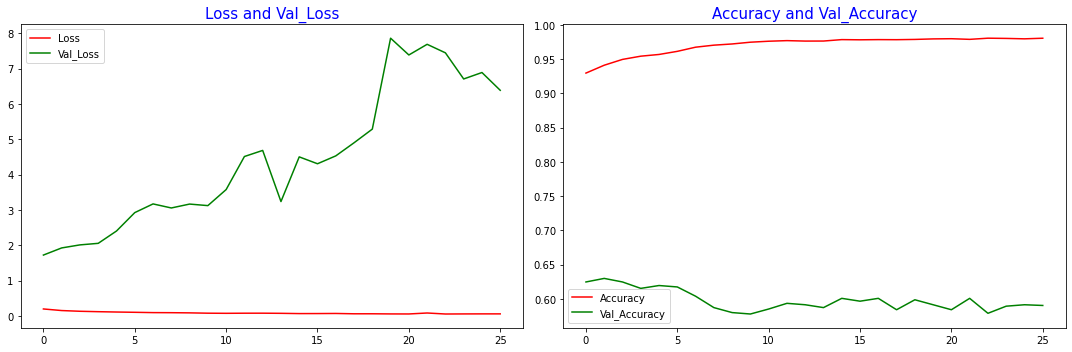

In [27]:
#Plotting the Loss & Val_Loss , Accuracy & Val_Accuracy
plt.figure(figsize = (15,5)),
plt.subplot(1,2,1)
plt.plot(history['loss'], color = 'r')
plt.plot(history['val_loss'], color = 'g')
plt.title('Loss and Val_Loss', size = 15,color = 'blue')
plt.legend(['Loss','Val_Loss'])

plt.subplot(1,2,2)
plt.plot(history['accuracy'], color = 'r')
plt.plot(history['val_accuracy'], color = 'g')
plt.title('Accuracy and Val_Accuracy', size = 15, color = 'blue')
plt.tight_layout()
plt.legend(['Accuracy','Val_Accuracy'])
plt.show()